In [3]:
!pip install biopandas


   ---------------------------------------- 0/3 [mmtf-python]
   ---------------------------------------- 0/3 [mmtf-python]
   ---------------------------------------- 0/3 [mmtf-python]
   ------------- -------------------------- 1/3 [looseversion]
   -------------------------- ------------- 2/3 [biopandas]
   -------------------------- ------------- 2/3 [biopandas]
   -------------------------- ------------- 2/3 [biopandas]
   -------------------------- ------------- 2/3 [biopandas]
   -------------------------- ------------- 2/3 [biopandas]
   -------------------------- ------------- 2/3 [biopandas]
   -------------------------- ------------- 2/3 [biopandas]
   ---------------------------------------- 3/3 [biopandas]




[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Cell 1: Imports
import gen_structure_graph as gsg
import matplotlib.pyplot as plt
import seaborn as sns
import math

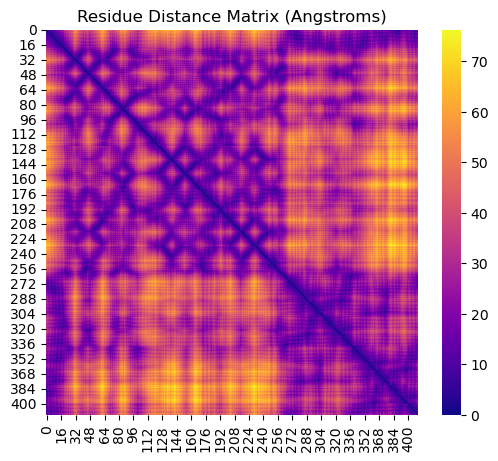

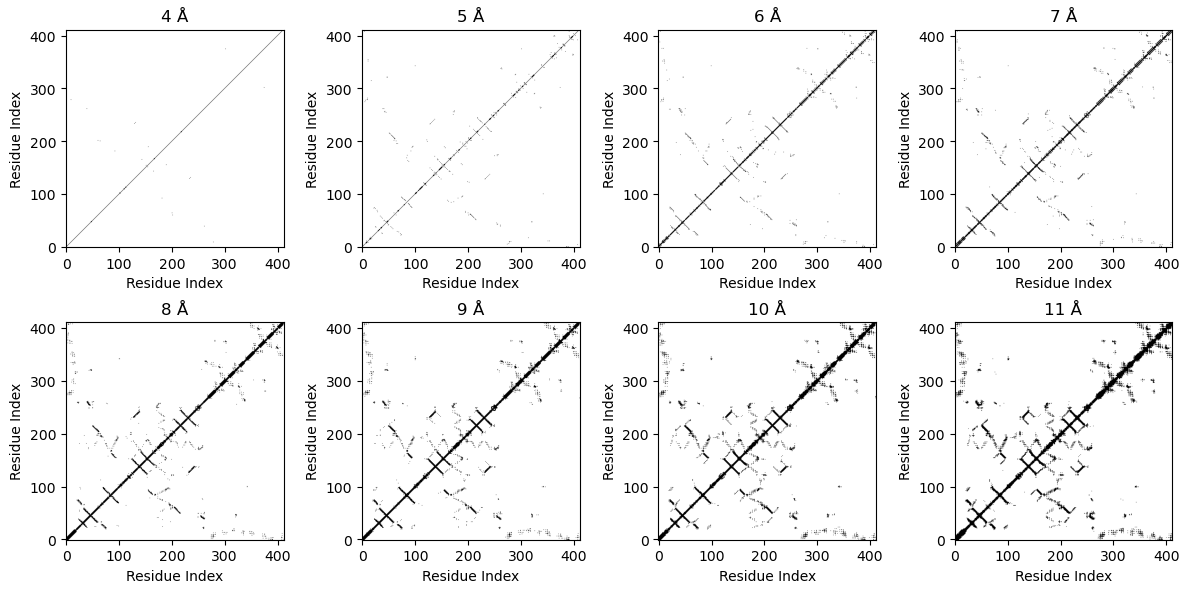

In [2]:
# 1. Load file
# Using your specific path to the CIF file
file_path = r"C:\Users\Shuyu\Desktop\Protein_Structure_Graph\structures\Pinkycamp_Ca_AF3.cif" 
# Note: Added 'r' before the string to handle backslashes correctly in Windows paths
dist_mtx = gsg.get_distance_matrix(file_path, atom_type='CB')

# 2. Plot Distance Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(dist_mtx, cmap='plasma')
plt.title("Residue Distance Matrix (Angstroms)")
plt.show()

# 3. Plot Contact Maps with different thresholds in 2 rows
thresholds = [4, 5, 6, 7, 8, 9, 10, 11]
num_thresholds = len(thresholds)
rows = 2
cols = math.ceil(num_thresholds / rows)  # Calculate columns needed (4 in this case)

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

for i, t in enumerate(thresholds):
    # Generate binary contact map
    cmap = gsg.get_contact_map(dist_mtx, t)
    
    # Plot on the corresponding subplot
    axes[i].imshow(cmap, cmap='Greys', origin='lower')
    axes[i].set_title(f"{t} Å")
    axes[i].set_xlabel("Residue Index")
    axes[i].set_ylabel("Residue Index")

# Hide any empty subplots if the number of thresholds is not a multiple of rows*cols
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [6]:
# --- 3. Nearby Residue Query (1-letter code) ---
target_idx = 281 
expected_aa = 'L' 
try:
    results = gsg.get_nearby_residues(file_path, target_idx, expected_aa, thresholds=[4, 5, 6, 7, 8])
    for t, neighbors in results.items():
        print(f"Within {t}Å: {neighbors}")
except Exception as e:
    print(e)

Validated: LEU(L) found at index 281.

Within 4Å: [{'index': 280, 'res_1': 'S', 'dist': np.float64(3.86)}, {'index': 282, 'res_1': 'F', 'dist': np.float64(3.84)}]
Within 5Å: [{'index': 280, 'res_1': 'S', 'dist': np.float64(3.86)}, {'index': 282, 'res_1': 'F', 'dist': np.float64(3.84)}]
Within 6Å: [{'index': 278, 'res_1': 'A', 'dist': np.float64(5.48)}, {'index': 279, 'res_1': 'F', 'dist': np.float64(5.42)}, {'index': 280, 'res_1': 'S', 'dist': np.float64(3.86)}, {'index': 282, 'res_1': 'F', 'dist': np.float64(3.84)}, {'index': 283, 'res_1': 'D', 'dist': np.float64(5.84)}]
Within 7Å: [{'index': 277, 'res_1': 'E', 'dist': np.float64(7.0)}, {'index': 278, 'res_1': 'A', 'dist': np.float64(5.48)}, {'index': 279, 'res_1': 'F', 'dist': np.float64(5.42)}, {'index': 280, 'res_1': 'S', 'dist': np.float64(3.86)}, {'index': 282, 'res_1': 'F', 'dist': np.float64(3.84)}, {'index': 283, 'res_1': 'D', 'dist': np.float64(5.84)}, {'index': 284, 'res_1': 'K', 'dist': np.float64(6.37)}, {'index': 375, 're